In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
MiniProject <br> <br> <br>World Development Incicators</p><br><br>

# Step 1: Initial exploration of the Dataset

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
data = pd.read_csv('./world-development-indicators/Indicators.csv') #in the same folder add the data 
data.shape

(5656458, 6)

### Are there any Null values?

In [251]:
# Check if there are NaN values
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

Explore what data set holds in

In [252]:
data.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


### How many UNIQUE indicator names are there ?

In [253]:
country = data['CountryName'].unique().tolist()
len(country)

247

### Are there many indicators or few ?

In [254]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [255]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [256]:
print(min(years)," to ",max(years))

1960  to  2015


# Step 2: Initial plot to for better understanding the data

### Lets pick a country and an indicator to explore: Water annual consumption in Poland

In [257]:
hist_indicator = 'Self-employed, total \(%'
hist_country = 'POL'
hist_country_2 = 'COL'
hist_country_3 = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)
mask3 = data['CountryCode'].str.contains(hist_country_2)
mask4 = data['CountryCode'].str.contains(hist_country_3)

# combine mask 1 and 2
stage = data[mask1 & mask2]
stage2 = data[mask1&mask3]
stage3 = data[mask1&mask4]

In [258]:
stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1074047,Poland,POL,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,1980,25.400000
1157619,Poland,POL,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,1981,25.700001
1242583,Poland,POL,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,1982,26.900000


### Let's see self employment have changed over time using MatplotLib

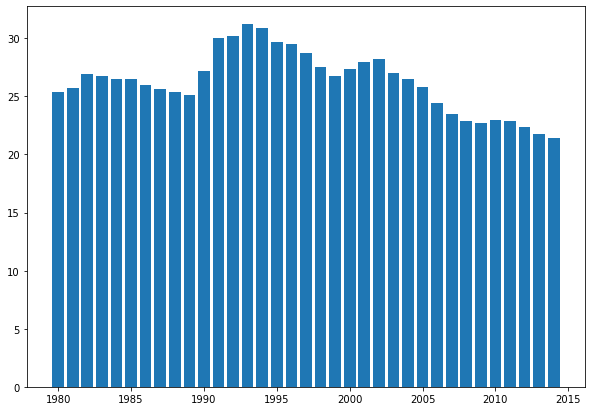

In [259]:
# get the years
years = stage['Year'].values
# get the values 
empl = stage['Value'].values

fig, axis = plt.subplots(figsize=(10,7)) 
# create
plt.bar(years,empl)
plt.show()

Change the graph for a line plot 

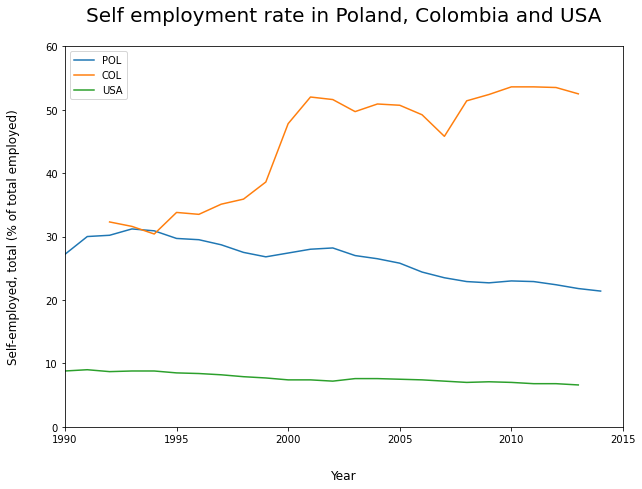

In [265]:
# switch to a line plot
fig, axis = plt.subplots(figsize=(10,7))  

plt.plot(stage['Year'].values, stage['Value'].values)
plt.plot(stage2['Year'].values, stage2['Value'].values)
plt.plot(stage3['Year'].values, stage3['Value'].values)

# Label the axes and title
axis.set_title('Self employment rate in Poland, Colombia and USA',fontsize=20, pad=25)
axis.set_xlabel('Year',fontsize=12, labelpad=25)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=12, labelpad=25)

# to make more honest, start they y axis at 0
plt.axis([1990, 2015,0,60])

plt.gca().legend(('POL','COL','USA'))

plt.show()

### Using Histograms to explore the distribution of values


In [266]:
hist_data = stage['Value'].values

In [267]:
print(len(hist_data))

35


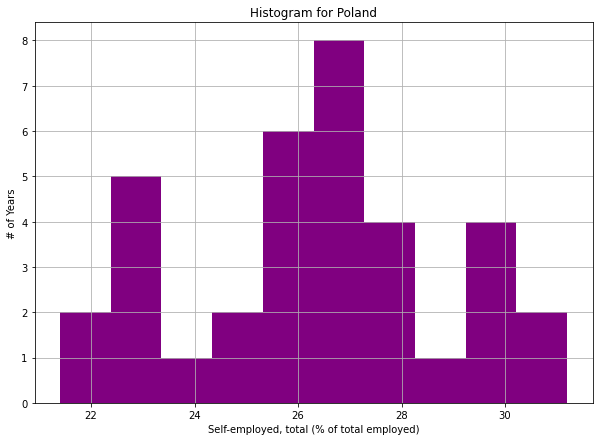

In [268]:
# the histogram of the data
fig, axis = plt.subplots(figsize=(10,7))  

plt.hist(hist_data, 10, density=False, facecolor='purple')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram for Poland')
plt.grid(True)
plt.show()

The employment rate in Poland vary from 21-31%.

### But how do Poland numbers relate to those of other countries?

In [269]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'Self-employed, total \(%'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
empl_2011 = data[mask1 & mask2]
empl_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5027728,Central Europe and the Baltics,CEB,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,2011,21.422639
5029656,Euro area,EMU,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,2011,15.887826
5030300,Europe & Central Asia (all income levels),ECS,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,2011,17.945656
5031157,Europe & Central Asia (developing only),ECA,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,2011,32.870729
5031751,European Union,EUU,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,2011,16.645202


For how many countries do we have Self employment % in 2011

In [270]:
print(len(empl_2011))

116


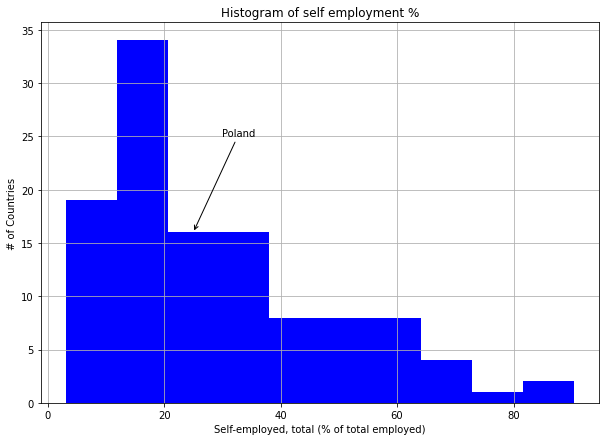

In [271]:
# let's plot a histogram of the self employment % by country

# subplots returns a touple with the figure, axis attributes.

fig, ax = plt.subplots(figsize=(10,7))

ax.annotate("Poland",
            xy=(25, 16), xycoords='data',
            xytext=(30, 25), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(empl_2011['Value'], 10, density=False, facecolor='blue')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of self employment %')

plt.grid(True)

plt.show()

So Poland, at ~25% self employment is among the average of all countries

An interesting next step, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

# Step 3: Analyze the correlation between two indicators

### Relationship between GPD and Self employment % in Poland, Colombia and USA

In [272]:
# select GDP Per capita emissions for Poland
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'POL'
hist_country_2 = 'COL'
hist_country_3 = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)
mask3 = data['CountryCode'].str.contains(hist_country_2)
mask4 = data['CountryCode'].str.contains(hist_country_3)


# combine mask 1 and 2
gdp_stage = data[mask1 & mask2]
gdp_stage2 = data[mask1&mask3]
gdp_stage3 = data[mask1&mask4]

In [273]:
gdp_stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1969896,Poland,POL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1990,4761.075493
2086226,Poland,POL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1991,4411.384448
2206480,Poland,POL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1992,4508.481926


In [274]:
stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1074047,Poland,POL,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,1980,25.400000
1157619,Poland,POL,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,1981,25.700001
1242583,Poland,POL,"Self-employed, total (% of total employed)",SL.EMP.SELF.ZS,1982,26.900000


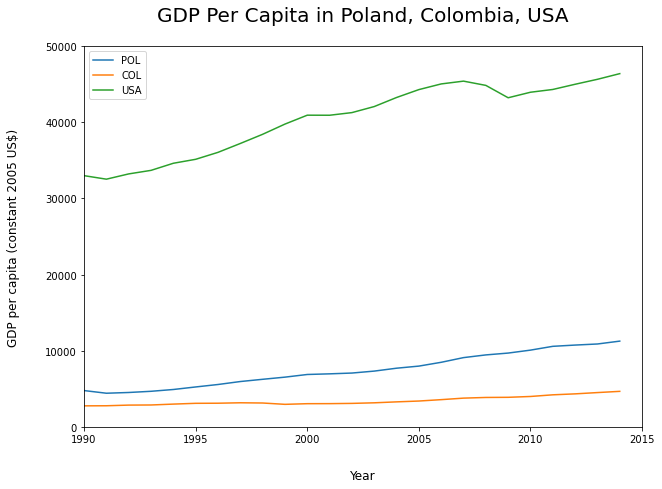

In [276]:
# switch to a line plot

fig, axis = plt.subplots(figsize=(10,7))  

plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)
plt.plot(gdp_stage2['Year'].values, gdp_stage2['Value'].values)
plt.plot(gdp_stage3['Year'].values, gdp_stage3['Value'].values)

# Label the axes and title
axis.set_title('GDP Per Capita in Poland, Colombia, USA',fontsize=20, pad=25)
axis.set_xlabel('Year',fontsize=12, labelpad=25)
axis.set_ylabel(gdp_stage['IndicatorName'].iloc[0],fontsize=12, labelpad=25)

plt.gca().legend(('POL','COL','USA'))

# to make more honest, start they y axis at 0
plt.axis([1990, 2015,0,50000])

plt.show()


So although we've seen a decline in the self employment, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against Self employment in Poland in age range 1994-2013

First, we'll need to make sure we're looking at the same time frames

In [277]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("Self-employment Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1990 max:  2014
Self-employment Min Year =  1980 max:  2014


We have 10 extra years of Self-emploument data, so we need to trim those off so the scatterplot has equal length arrays to compare

In [278]:
gdp_stage_trunc_1 = gdp_stage[gdp_stage['Year'] > 1993]
gdp_stage_trunc = gdp_stage_trunc_1[gdp_stage_trunc_1['Year'] < 2014]
stage_1 = stage[stage['Year'] > 1993]
stage = stage_1[stage_1['Year'] < 2014]
print(len(gdp_stage_trunc))
print(len(stage))

20
20


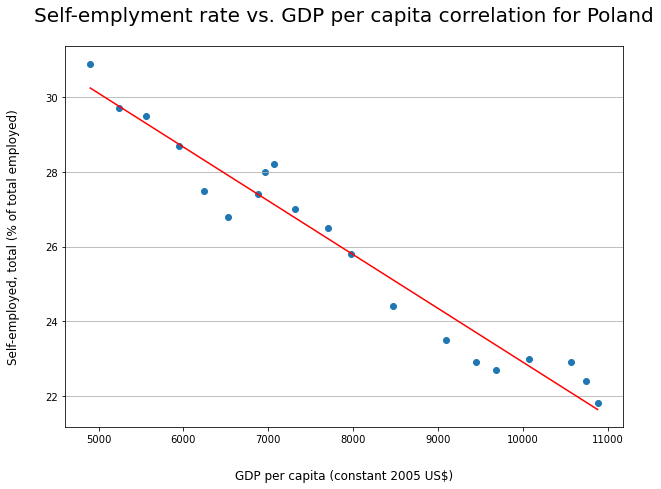

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10,7))   

# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Self-emplyment rate vs. GDP per capita correlation for Poland',fontsize=20, pad=25)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=12, labelpad=25)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=12, labelpad=25)


X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "red")


This look like there is a strong relationship.  We can test this by looking at correlation.

In [228]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[ 1.        , -0.97554446],
       [-0.97554446,  1.        ]])

A correlation of -0.97 is very strong negative correlation.

### ScatterPlot for comparing GDP against Self employment in Colombia in age range 1994-2013

First, we'll need to make sure we're looking at the same time frames

In [229]:
print("GDP Min Year = ", gdp_stage2['Year'].min(), "max: ", gdp_stage2['Year'].max())
print("Self-employment Min Year = ", stage2['Year'].min(), "max: ", stage2['Year'].max())

GDP Min Year =  1960 max:  2014
Self-employment Min Year =  1992 max:  2013


In [283]:
gdp_stage_trunc_1 = gdp_stage2[gdp_stage2['Year'] > 1993]
gdp_stage_trunc = gdp_stage_trunc_1[gdp_stage_trunc_1['Year'] < 2014]
stage2 = stage2[stage2['Year'] > 1993]
print(len(gdp_stage_trunc))
print(len(stage2))

20
20


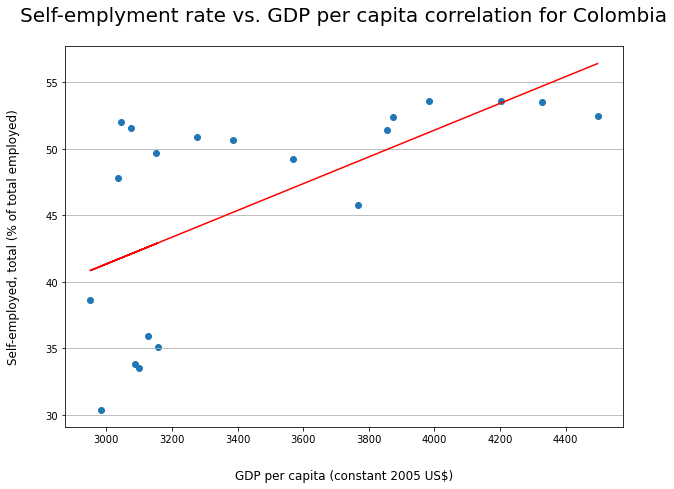

In [285]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10,7))   

# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Self-emplyment rate vs. GDP per capita correlation for Colombia',fontsize=20, pad=25)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=12, labelpad=25)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=12, labelpad=25)


X = gdp_stage_trunc['Value']
Y = stage2['Value']

axis.scatter(X, Y)

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "red")


In [286]:
np.corrcoef(gdp_stage_trunc['Value'],stage2['Value'])

array([[1.       , 0.6160888],
       [0.6160888, 1.       ]])

### ScatterPlot for comparing GDP against Self employment in USA in age range 1994-2013

First, we'll need to make sure we're looking at the same time frames

In [287]:
print("GDP Min Year = ", gdp_stage3['Year'].min(), "max: ", gdp_stage3['Year'].max())
print("Self-employment Min Year = ", stage3['Year'].min(), "max: ", stage3['Year'].max())

GDP Min Year =  1960 max:  2014
Self-employment Min Year =  1980 max:  2013


In [288]:
gdp_stage_trunc_1 = gdp_stage3[gdp_stage3['Year'] > 1993]
gdp_stage_trunc = gdp_stage_trunc_1[gdp_stage_trunc_1['Year'] < 2014]
stage3 = stage3[stage3['Year'] > 1993]
print(len(gdp_stage_trunc))
print(len(stage3))

20
20


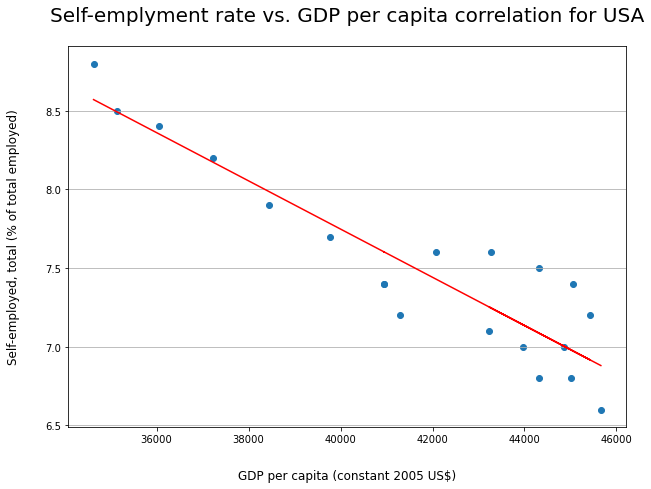

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10,7))   

# Grid lines, Xticks, Xlabel, Ylabel
axis.yaxis.grid(True)
axis.set_title('Self-emplyment rate vs. GDP per capita correlation for USA',fontsize=20, pad=25)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=12, labelpad=25)
axis.set_ylabel(stage3['IndicatorName'].iloc[0],fontsize=12, labelpad=25)


X = gdp_stage_trunc['Value']
Y = stage3['Value']

axis.scatter(X, Y)

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "red")

In [290]:
np.corrcoef(gdp_stage_trunc['Value'],stage3['Value'])

array([[ 1.        , -0.91665104],
       [-0.91665104,  1.        ]])